In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import Manuel as mn 

In [2]:
df = mn.cargar_dataset('Cambridge.csv')
pd.options.display.max_rows =10

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            1287 non-null   int64  
 1   listing_url                                   1287 non-null   object 
 2   scrape_id                                     1287 non-null   int64  
 3   last_scraped                                  1287 non-null   object 
 4   source                                        1287 non-null   object 
 5   name                                          1287 non-null   object 
 6   description                                   1273 non-null   object 
 7   neighborhood_overview                         737 non-null    object 
 8   picture_url                                   1287 non-null   object 
 9   host_id                                       1287 non-null   i

In [4]:
mn.cuenta_valores_nulos(df)
pd.options.display.max_rows = None
mn.cuenta_valores_nulos(df)

('Valores nulos por columna',
 id                                                 0
 listing_url                                        0
 scrape_id                                          0
 last_scraped                                       0
 source                                             0
 name                                               0
 description                                       14
 neighborhood_overview                            550
 picture_url                                        0
 host_id                                            0
 host_url                                           0
 host_name                                          0
 host_since                                         0
 host_location                                    251
 host_about                                       482
 host_response_time                               121
 host_response_rate                               121
 host_acceptance_rate                              8

In [ ]:
data = df.fillna(method="bfill")
data = df.fillna(method="ffill")
data["license"] = data["license"].fillna(0)
data

In [6]:
valores_nulos=data.isnull().sum()
valores_nulos

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                        0
neighborhood_overview                              0
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                      0
host_about                                         0
host_response_time                                 0
host_response_rate                                 0
host_acceptance_rate                               0
host_is_superhost                             

In [13]:
data["neighbourhood_group_cleansed"] = data["neighbourhood_group_cleansed"].fillna(0)

In [15]:
valores_nulos=data.isnull().sum()
valores_nulos

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                        0
neighborhood_overview                              0
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                      0
host_about                                         0
host_response_time                                 0
host_response_rate                                 0
host_acceptance_rate                               0
host_is_superhost                             

In [19]:
data["calendar_updated"] = data["calendar_updated"].fillna(0)

In [20]:
valores_nulos=data.isnull().sum()
valores_nulos

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
name                                            0
description                                     0
neighborhood_overview                           0
picture_url                                     0
host_id                                         0
host_url                                        0
host_name                                       0
host_since                                      0
host_location                                   0
host_about                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_thumbnail_url                              0


In [21]:
data["bathrooms"] = data["bathrooms"].fillna(0)


In [22]:
valores_nulos=data.isnull().sum()
valores_nulos

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
name                                            0
description                                     0
neighborhood_overview                           0
picture_url                                     0
host_id                                         0
host_url                                        0
host_name                                       0
host_since                                      0
host_location                                   0
host_about                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_thumbnail_url                              0


In [23]:
data["beds"] = data["beds"].fillna(0)

In [24]:
valores_nulos=data.isnull().sum()
valores_nulos

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
name                                            0
description                                     0
neighborhood_overview                           0
picture_url                                     0
host_id                                         0
host_url                                        0
host_name                                       0
host_since                                      0
host_location                                   0
host_about                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_thumbnail_url                              0


In [25]:
data["price"] = data["price"].fillna(0)

In [26]:
valores_nulos=data.isnull().sum()
valores_nulos

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
name                                            0
description                                     0
neighborhood_overview                           0
picture_url                                     0
host_id                                         0
host_url                                        0
host_name                                       0
host_since                                      0
host_location                                   0
host_about                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_thumbnail_url                              0


In [27]:
#Creo 2 dataframe para poder procesar los outliers
cuantitativas = data.select_dtypes(include=['float64', 'int64', 'float', 'int'])
cualitativas = data.select_dtypes(include=['object','datetime','category'])

<Figure size 1500x800 with 0 Axes>

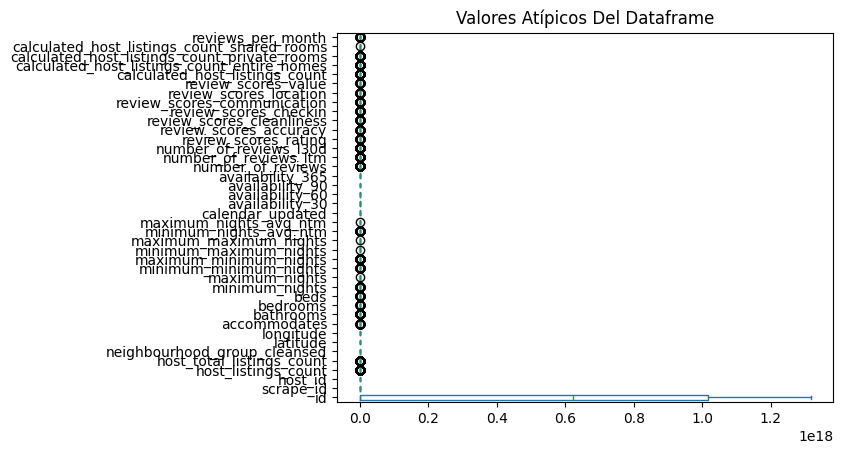

In [28]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15,8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos Del Dataframe")
plt.show() #dibujamos el diagrama

In [29]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y = cuantitativas

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5*iqr
Limite_Inferior_iqr = percentile25 - 1.25*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido id                                              2.541961e+18
scrape_id                                       2.024123e+13
host_id                                         7.108378e+08
host_listings_count                             4.320000e+02
host_total_listings_count                       9.315000e+02
neighbourhood_group_cleansed                    0.000000e+00
latitude                                        4.240224e+01
longitude                                      -7.104733e+01
accommodates                                    7.000000e+00
bathrooms                                       1.000000e+00
bedrooms                                        3.500000e+00
beds                                            3.500000e+00
minimum_nights                                  7.200000e+01
maximum_nights                                  2.265000e+03
minimum_minimum_nights                          7.350000e+01
maximum_minimum_nights                          7.300000e+0

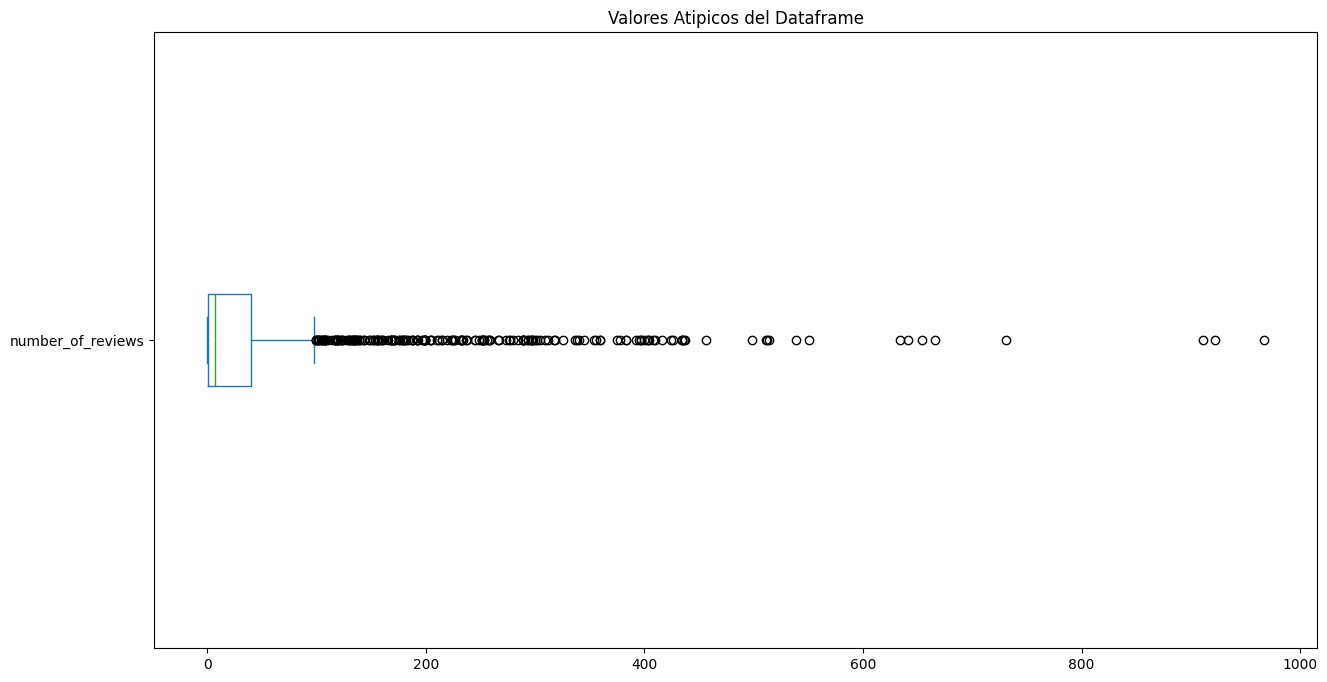

In [32]:
fig = plt.figure(figsize=(15, 8))#el size lo pones tu para que mida lo que quieras ejemplo, 15x8cm
cuantitativas['number_of_reviews'].plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show() #dibujamos el diagrama

In [ ]:
#Obtenemos datos limpios del Dataframe
data3_iqr = cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

In [34]:
#Coroboramos valores nulos del dataframe LIMPIO
valores_nulos = data3_iqr.isnull().sum()
valores_nulos

id                                                0
scrape_id                                         0
host_id                                           0
host_listings_count                             201
host_total_listings_count                       255
neighbourhood_group_cleansed                      0
latitude                                          0
longitude                                        13
accommodates                                     63
bathrooms                                       326
bedrooms                                         57
beds                                            110
minimum_nights                                  114
maximum_nights                                    1
minimum_minimum_nights                          102
maximum_minimum_nights                          276
minimum_maximum_nights                            1
maximum_maximum_nights                            1
minimum_nights_avg_ntm                          115
maximum_nigh

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr =data3_iqr.copy()
data4_iqr = data4_iqr.fillna(round(data3_iqr.mean(), 1))
data4_iqr

In [38]:
valores_nulos=data4_iqr.isnull().sum()
valores_nulos

id                                              0
scrape_id                                       0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0


In [ ]:
#Unimos el dataframe cuantitativo limpio con el dataframe cualitativo

Datos_limpios = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios

In [40]:
#Convertir a csv
Datos_limpios.to_csv("Datos_limpios_Cambridge.csv")